# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [13]:
df = pd.read_csv('../data/states_edu.csv')
df.shape
df.head
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [16]:
# In that case, we will drop all the rows where the 8th grading reading score is missing
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,67764.0,63943.0,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,35034.0,35936.0,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,54382.0,53556.0,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Reading

How many years of data are logged in our dataset? 

In [ ]:
21

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [21]:
states = df.groupby("STATE")
states["AVG_READING_4_SCORE"].mean()
Ohio does somehow.

SyntaxError: invalid syntax (<ipython-input-21-e9b49ba50b5b>, line 3)

Find the average for your outcome score across all states in 2019

In [20]:
df["AVG_READING_4_SCORE"].mean()

219.48398576512454

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [22]:
states = df.groupby("STATE")
states["AVG_READING_4_SCORE"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   226.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [26]:
df['GROWTH_OVER_TIME'] = ((df['AVG_READING_8_SCORE'] - df['AVG_READING_4_SCORE']) / 4)


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,GROWTH_OVER_TIME
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0,11.00
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,63943.0,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0,13.50
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,35936.0,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0,11.75
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0,12.50
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,53556.0,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,9.50
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,11.50
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,10.75
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,11.75


Feature engineering justification: Being able to see the change over time and how it's changed over the years allows for a broader understanding of if the trends just affect grade 4 and if primary education is the problem and how impactful it really is in the long term.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

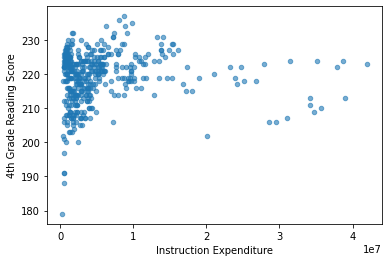

In [34]:

df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Reading Score')

4th grade reading scores vs intruction expenditure. Notably, very little amount spend can result in low scores and high amounts spent only result in higher scores. However, majority of students seem to have low expidenture and high scores, meaning the correlation is not as impactful.

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

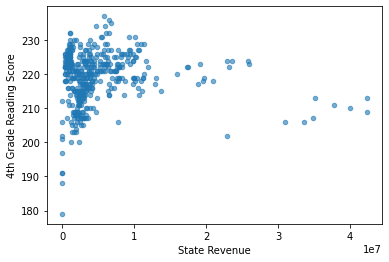

In [36]:
df.plot.scatter(x='STATE_REVENUE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('State Revenue')
plt.ylabel('4th Grade Reading Score')

4th grade reading scores vs state revenue. Notably, higher revenue results in only scores above 200 and the lowest scores come from the lowest revenue. However, majority of students perform well even without high revenue, indicating there is limited correlation.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X = df[['ENROLL','AVG_READING_8_SCORE','STATE_REVENUE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

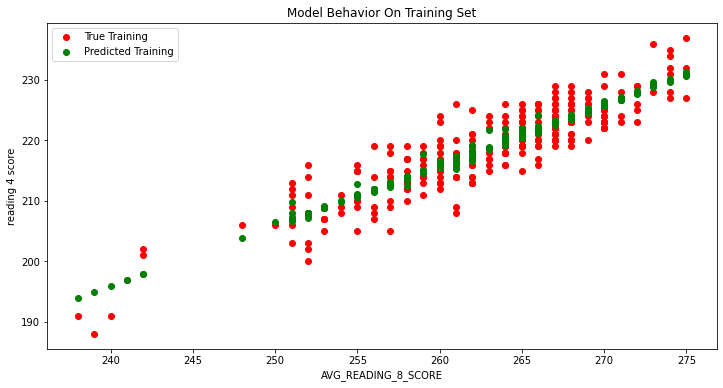

In [49]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('reading 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

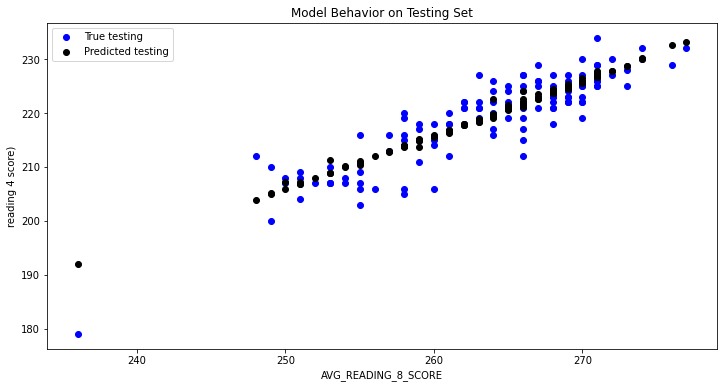

In [51]:
col_name = "AVG_READING_8_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('reading 4 score)')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Using python, I parsed through a huge dataset and isolated important data to observe relevant trends. I chose to isolate reading scores for 4th graders and found that the amount of revenue spent on 4th graders was relatively unrelated to how well they did on their exams, only ensuring they didn't hit a minimum or score below a certain point. After putting this data into a machine learning model, I graphed the outputted predictions of the machine on the relationship/trends observed between reading 4 score and reading 8 score and foudn that the machine was overall pretty accurate, more or less creating a line of best fit of the actual data. 